# TidyData Project

##  Step 1: Data Cleaning


### Import Dependencies and Load data

We import the python libraries needed 
(<em>numpy,</em>
<em>pandas,</em>
<em>matplotlib,</em>
<em>seaborn</em>) and load the Federal R&D spending dataset `fed_rd_year&gdp.csv` into a pandas dataframe. There is also a concise visualization of what the data looks like.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Setting matplotlib style and seaborn palette
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Read CSV file into Dataframe
df = pd.read_csv('fed_rd_year&gdp.csv')

# Visualize the dataset
print(f"Dataset shape: {df.shape}") # Find nmumber of rows and columns
df.head() # Display first 5 rows

Dataset shape: (14, 43)


,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,...,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,...,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,...,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,...,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,...,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000


### Reshape dataset from Wide to Long
Reshape the dataset from wide to long format using melt. Each row will now represent a single department-year observation with year and GDP information.

In [ ]:
# separate value and id variables
id_vars = ['department']
value_vars = [col for col in df.columns if col != 'department']

# Melt the DataFrame to long format
melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, 
                   var_name='year_gdp', value_name='spending')

# Display melted DataFrame
melted_df.head() 


,department,year_gdp,spending
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,8.190000e+08
2,DOD,1976_gdp1790000000000.0,3.569600e+10
3,DOE,1976_gdp1790000000000.0,1.088200e+10
4,DOT,1976_gdp1790000000000.0,1.142000e+09


Extracting year and GDP using regex. The `year_gdp` column contains embedded year and GDP values in a string format, so it must be extracted using Regex into separate columns.

We also calculate the percentage of GDP spent on R&D into a new column called pct_of_gdp

In [ ]:
# Extract year and GDP from the year_gdp column
melted_df['year'] = melted_df['year_gdp'].str.extract(r'(\d{4})').astype(int)
melted_df['gdp'] = melted_df['year_gdp'].str.extract(r'gdp(\d+\.*\d*)').astype(float)

# Calculate percentage of GDP
melted_df['pct_of_gdp'] = (melted_df['spending'] / melted_df['gdp']) * 100  

# Display melted DataFrame
melted_df.head() 


,department,year_gdp,spending,year,gdp,pct_of_gdp
0,DHS,1976_gdp1790000000000.0,NaN,1976,1.790000e+12,NaN
1,DOC,1976_gdp1790000000000.0,8.190000e+08,1976,1.790000e+12,0.045754
2,DOD,1976_gdp1790000000000.0,3.569600e+10,1976,1.790000e+12,1.994190
3,DOE,1976_gdp1790000000000.0,1.088200e+10,1976,1.790000e+12,0.607933
4,DOT,1976_gdp1790000000000.0,1.142000e+09,1976,1.790000e+12,0.063799


Cleaning up melted DF, dropping redundant year_gdp column

In [31]:
tidy_df = melted_df.drop(columns=['year_gdp'])
tidy_df.head()


,department,spending,year,gdp,pct_of_gdp
0,DHS,NaN,1976,1.790000e+12,NaN
1,DOC,8.190000e+08,1976,1.790000e+12,0.045754
2,DOD,3.569600e+10,1976,1.790000e+12,1.994190
3,DOE,1.088200e+10,1976,1.790000e+12,0.607933
4,DOT,1.142000e+09,1976,1.790000e+12,0.063799


## Step 2: Data Visualizations 


Created a line chart that shows how R&D spending as a percentage of GDP evolved from 1976 to 2017 for the five departments with the highest total R&D spending.

Justification: In order to display this data in the most clear way, a line chart is great because it allows us to visualize how the % of GDP changes as time increase, while also providing a comparative view of each department. 

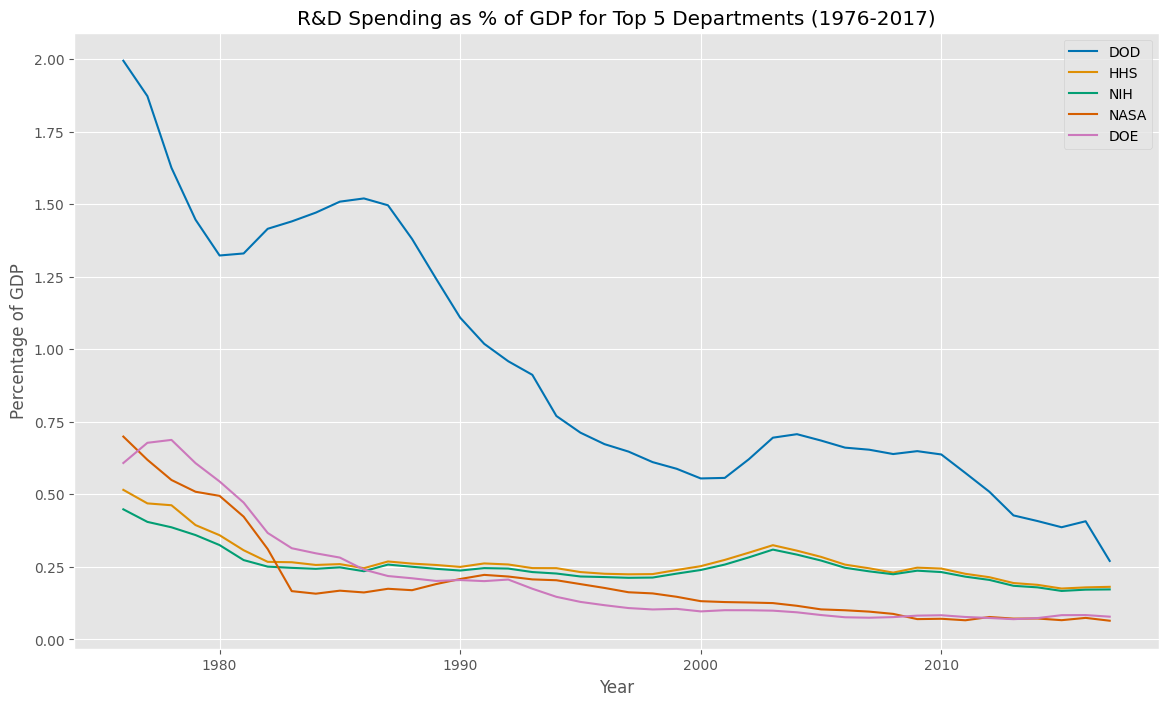

In [ ]:
# Get the top
top_depts = tidy_df.groupby('department')['spending'].sum().nlargest(5).index

# Create the line plot
plt.figure(figsize=(14, 8))
for dept in top_depts:
    dept_data = tidy_df[tidy_df['department'] == dept]
    plt.plot(dept_data['year'], dept_data['pct_of_gdp'], label=dept)
    

plt.title('R&D Spending as % of GDP for Top 5 Departments (1976-2017)')
plt.xlabel('Year')
plt.ylabel('Percentage of GDP')
plt.legend()
plt.grid(True)


### Department spending comparison for the most recent year

Created a bar chart that displays the average percentage of GDP each department spent on R&D for the latest year, sorted from highest to lowest. Takes in a variable called recent_year so that the latest year can dynamically change as the dataset gets updated.

Justification: Since time is no longer a factor (as we are only looking at the data for a given year), the bar chart provides a clear categorical comparison of spending, and sorting the departments makes the trend clear and emphasizes the biggest spenders.

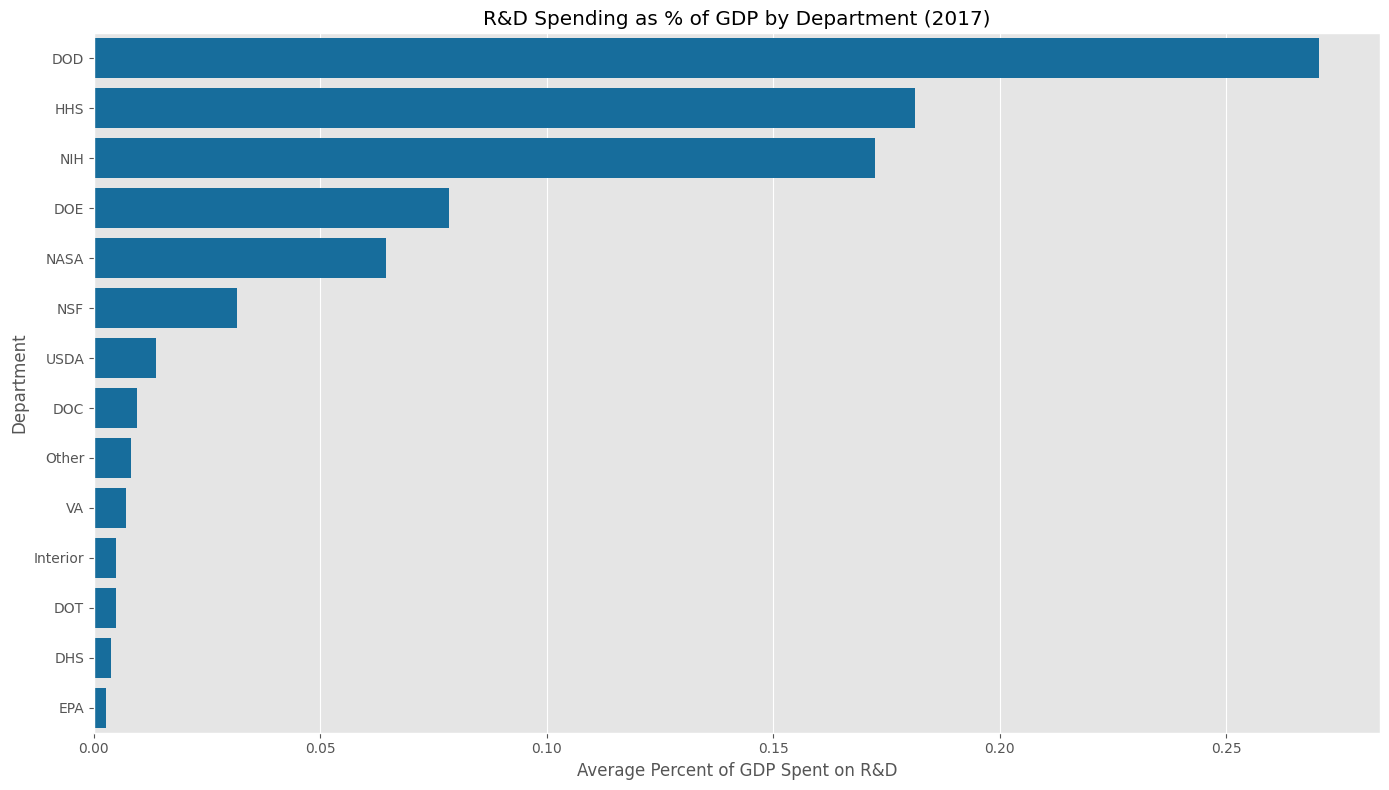

In [88]:
# Find Latest year from the dataset
recent_year = tidy_df['year'].max()

# Extract values from latest year
recent_data = tidy_df[tidy_df['year'] == recent_year].sort_values('pct_of_gdp', ascending=False)

# Plotting the latest year data
plt.figure(figsize=(14, 8))
sns.barplot(x='pct_of_gdp', y='department', data=recent_data)


plt.title(f'R&D Spending as % of GDP by Department ({recent_year})')
plt.xlabel('Average Percent of GDP Spent on R&D')
plt.ylabel('Department')
plt.tight_layout()
plt.show()



### Heatmap for R&D spending trends over time

This visualization shows the percentage of GDP spent on R&D by each federal department over time. The pivbot table summarizes average spending and the heatmap visualizes the trends and variations across years, with color intensity showing the spending level.

Justification: AA heatmap is appropriate because it clearly shows spending patterns over time across many departments in a compact, visual format that allows for a lot of data points in an easily comprehensive way. 

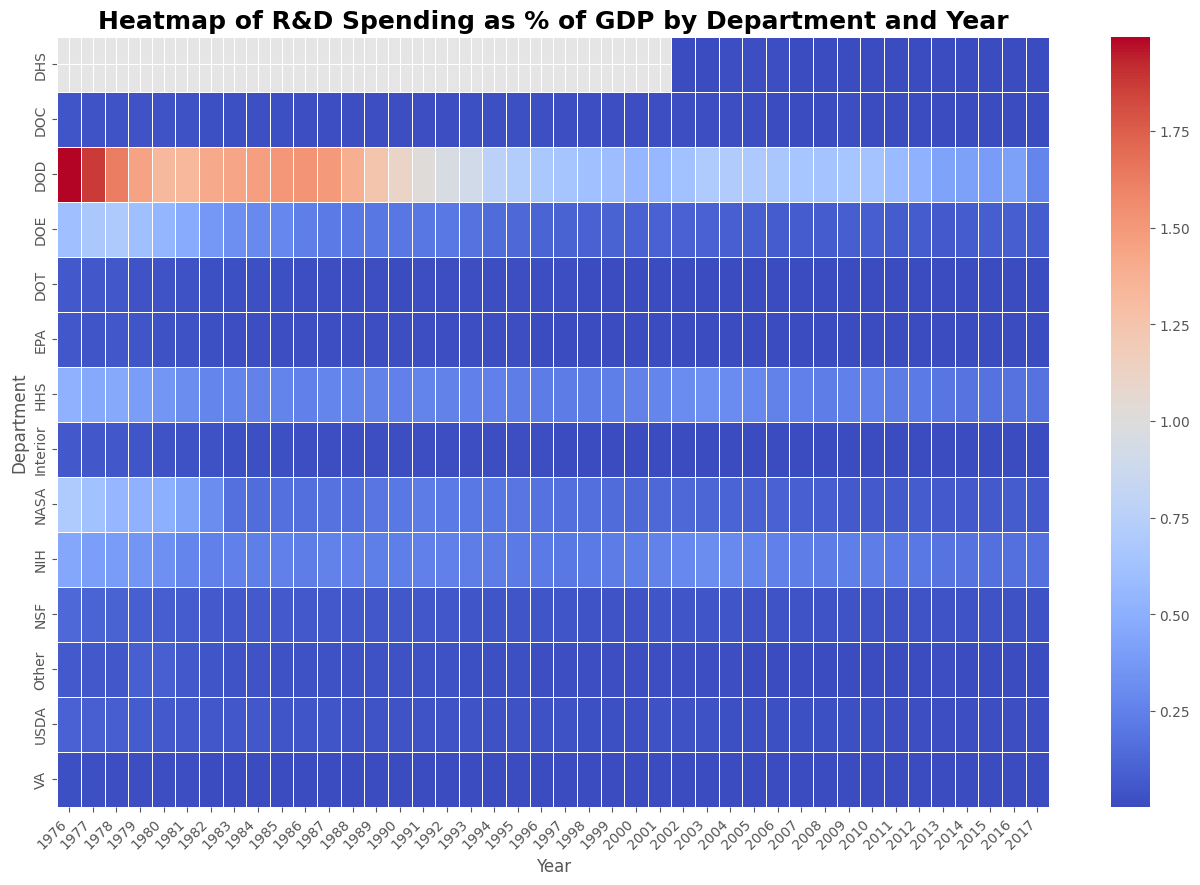

In [71]:
# Create Pivot Table for Heatmap
pivot_df = tidy_df.pivot_table(
    values='pct_of_gdp',
    index='department',
    columns='year',
    aggfunc='mean'
)

# Create seaborn heatmap and customize plot
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of R&D Spending as % of GDP by Department and Year', fontsize=18, fontweight='bold', loc='center')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Department')

plt.show()


### Analyzing average spending by department

Justification: This table (pandas dataframe) demonstarates precise average spending values by department, making it easy to read, compare, and reference exact the numbers.

In [90]:
# Calculate average spending by department
avg_spending = tidy_df.groupby('department')['pct_of_gdp'].mean().sort_values()

# Convert to a DataFrame for better visualization
pd.DataFrame(avg_spending)


,pct_of_gdp
department,
DHS,0.006893
VA,0.009005
EPA,0.013687
DOT,0.015749
Interior,0.016046
DOC,0.017452
Other,0.025885
USDA,0.036455
NSF,0.054083
